<div style="text-align: center; font-size:1.25em;"> Michael Colella, Christopher Williams, Jonathan Williams</div>
<div style="text-align: center"> MCSA 32003 Marketing Analytics </div>
<div style="text-align: center"> Medicine Data Analysis, Assignment 1: Part 1 </div>

<div>
<img src="https://ichef.bbci.co.uk/news/1024/cpsprodpb/C338/production/_107567994_gettyimages-842220716.jpg" width="300" align="center"/>
</div>

### Table of Contents
<br>
<div class="toc">
  <ol>
      <a id='home01'></a>
      <li><a href="#1"><span style="font-size:1.15em;"><b>Data Processing:</b></span></a>
          <br>&ensp;&ensp;<a href="#1a">Data Prep & Exploration</a>
          <br>&ensp;&ensp;<a href="#1b">Data Encoding</a>
          <br>&ensp;&ensp;<a href="#1c">Data Imputation</a>
      </li><br>
      <a id='home02'></a>
      <li><a href="#2"><span style="font-size:1.15em;"><b>Dimension Reduction (PCA):</b></span></a>
          <br>&ensp;&ensp;<a href="#2a">Scale Features</a>
          <br>&ensp;&ensp;<a href="#2b">Eigen decomposition, covariance matrix, Eigenvector and Eigenvalues</a>
          <br>&ensp;&ensp;<a href="#2c">Loadings</a>
          <br>&ensp;&ensp;<a href="#2d">Determine the Number of Factors to Retain</a>
      </li><br>
      <a id='home03'></a>
      <li><a href="#3"><span style="font-size:1.15em;"><b>Clustering (K-Means):</b></span></a>
          <br>&ensp;&ensp;<a href="#3a">Determine the Number of Clusters</a>
          <br>&ensp;&ensp;<a href="#3b">Evaluate Cluster Integrity </a>
      </li><br>
      <a id='home04'></a>
      <li><a href="#4"><span style="font-size:1.15em;"><b>Market Segmentation:</b></span></a>
          <br>&ensp;&ensp;<a href="#4a">Segment Counts and Question Statistics</a>
          <br>&ensp;&ensp;<a href="#4b">Segment Evaluation</a>
          <br>&ensp;&ensp;<a href="#4c">Build an Index for Segment Comparison</a>
      </li><br>
    </ol>
</div>

#### Necessary imports

In [1]:
%%time

import os
from os.path import basename
import sys
import platform
import warnings
warnings.filterwarnings("ignore") # supress warnings
import pandas as pd
from pandas import Grouper, DataFrame, concat
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import itertools
from pylab import rcParams
import math
from math import sqrt
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_row', 20) # set max row display
pd.set_option('display.max_columns', 20) # set max column width

# enable ability to see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

Wall time: 3.66 s


## 1. Data Processing: <a name="1"></a>
[return to top](#home01)

### Data Prep & Exploration <a name="1a"></a>

In [2]:
%%time

data = pd.read_excel (r'medicine_data.xls') # read in data
data_copy = data.iloc[1:].copy() # create copy of data

print(data.shape)
data.head(3) # preview data; L - lifestyle, B - Behavior, N - Needs, A - Attitude

(349, 17)
Wall time: 47.9 ms


,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine
0,NaN,L,L,A,A,A,B,B,N,A,N,N,B,B,B,N,A
1,1128.0,3_to_4,5_to_6,1_to_2,1_to_2,5_to_6,5_to_6,5_to_6,5_to_6,1_to_2,1_to_2,5_to_6,1_to_2,5_to_6,5_to_6,5_to_6,1_to_2
2,1836.0,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,5_to_6,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,3_to_4,3_to_4,1_to_2,1_to_2


In [3]:
%%time

data = data.drop(['ID'], axis=1) # drop ID column

patients = data.iloc[1:] # create copy of data, not including 1st row
print(patients.shape) # should have 1 less row now, so 348
patients.head(2)

for col in patients[1:]: # get unique values per column
    print(patients[col].unique()) # while no null values, there are missing responses (aka, 'No ans.')
    
    
patients = patients.reset_index()
patients = patients.drop(['index'], axis=1)

(348, 16)
['3_to_4' '1_to_2' '5_to_6' 'No ans.']
['5_to_6' '1_to_2' '3_to_4' 'No ans.']
['1_to_2' '3_to_4' '5_to_6' 'No ans.']
['1_to_2' '5_to_6' '3_to_4' 'No ans.']
['5_to_6' '1_to_2' '3_to_4' 'No ans.']
['5_to_6' '3_to_4' '1_to_2' 'No ans.']
['5_to_6' '3_to_4' '1_to_2' 'No ans.']
['5_to_6' '1_to_2' '3_to_4' 'No ans.']
['1_to_2' '3_to_4' '5_to_6' 'No ans.']
['1_to_2' '3_to_4' '5_to_6' 'No ans.']
['5_to_6' '1_to_2' '3_to_4' 'No ans.']
['1_to_2' '3_to_4' '5_to_6' 'No ans.']
['5_to_6' '3_to_4' '1_to_2' 'No ans.']
['5_to_6' '3_to_4' '1_to_2' 'No ans.']
['5_to_6' '1_to_2' '3_to_4' 'No ans.']
['1_to_2' '3_to_4' '5_to_6' 'No ans.']
Wall time: 7.56 ms


In [4]:
%%time

col_vals = patients.columns.values # get column names

print('\033[1m' + 'Number of columns with rating scales:' + '\033[0;0m')
print(len(col_vals)) # corresponds to the 16 cols remaining
print(' ')
print('\033[1m' + 'Origin column names:' + '\033[0;0m')
print(col_vals)

# rename cols with dict
patients.rename(columns={'Constantly under stress': 'stress',
                        'Stuggle with work-life balance': 'balance',
                         patients.columns[2]: 'no_slow',
                        'Concerned about interaction of medicine w/Rx': 'med_interaction',
                        'Concerned about interaction of medicine w/alcohol': 'alcohol_interaction',
                        'Lookout for newest medicine': 'newest_med',
                        'Waging war on symptoms': 'symptom_war',
                        'Need Fast acting medicine': 'fast_act',
                         patients.columns[8]: 'cost_works',
                         patients.columns[9]: 'upset_stomach',
                        'Need long lasting affect': 'long_last',
                        'Get info on different medicine from family and friends': 'get_info',
                        'Carry medicince everywhere': 'carry_medicine',
                        'Medicine at first sign of symptoms': 'med_sx',
                        'Need strong medicine': 'strong_meds',
                        'Interested in all alternate medicine': 'alt_meds'}, 
                inplace=True)
print(' ')
print('\033[1m' + 'Renamed column values:' + '\033[0;0m')
col_vals_2 = patients.columns.values
print(col_vals_2) # names look good; retains all 16 necessary cols

Number of columns with rating scales:
16
 
Origin column names:
['Constantly under stress' 'Stuggle with work-life balance'
 "Symptoms don't slow me down"
 'Concerned about interaction of medicine w/Rx'
 'Concerned about interaction of medicine w/alcohol'
 'Lookout for newest medicine' 'Waging war on symptoms'
 'Need Fast acting medicine' "Don't care about cost if works"
 "Medicine that won't upset stomach" 'Need long lasting affect'
 'Get info on different medicine from family and friends'
 'Carry medicince everywhere' 'Medicine at first sign of symptoms'
 'Need strong medicine' 'Interested in all alternate medicine']
 
Renamed column values:
['stress' 'balance' 'no_slow' 'med_interaction' 'alcohol_interaction'
 'newest_med' 'symptom_war' 'fast_act' 'cost_works' 'upset_stomach'
 'long_last' 'get_info' 'carry_medicine' 'med_sx' 'strong_meds' 'alt_meds']
Wall time: 1.42 ms


Check to see how many times no response was given per column

Wall time: 51.9 ms


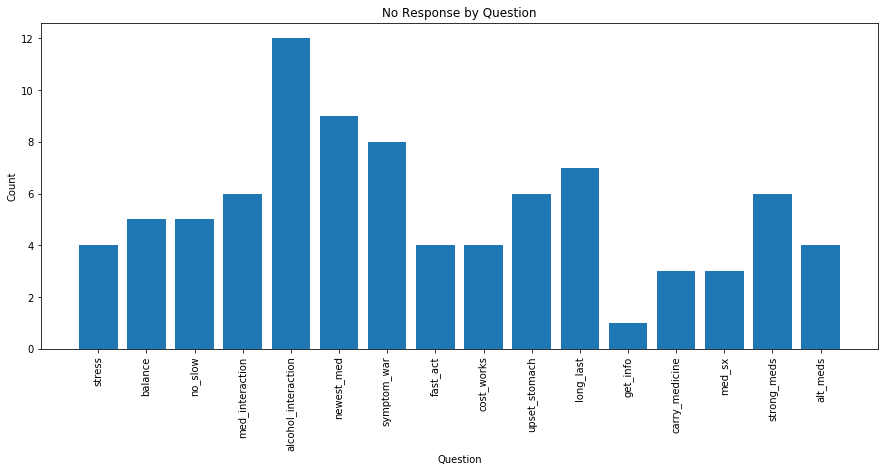

In [5]:
%%time

no_response = []

for col in patients.columns:
    no_response.append(len(patients[patients[col] == 'No ans.'])) # most prevalent for question/comment about alcohol

rr = plt.figure(figsize=(15, 6))
za = plt.bar(col_vals_2, no_response)

ar = plt.xlabel('Question')
zr = plt.xticks(rotation=90)
pu = plt.ylabel('Count')
ta = plt.title('No Response by Question')

### Data Encoding <a name="1b"></a>
Encode ratings with values so summary stats can be run and later scaling.

In [6]:
%%time

# replace/recode column values with numbers
patients_rep = patients.replace({'1_to_2': '1', '3_to_4': '2', '5_to_6': '3', 'No ans.': '0'}) 
# 'No ans.' is now coded as '0'

print('\033[1m' + 'dtypes check of columns:' + '\033[0;0m')
print(patients_rep.dtypes) # object types will be swtiched to int later

patients_rep.head(3) # preview change

dtypes check of columns:
stress                 object
balance                object
no_slow                object
med_interaction        object
alcohol_interaction    object
newest_med             object
symptom_war            object
fast_act               object
cost_works             object
upset_stomach          object
long_last              object
get_info               object
carry_medicine         object
med_sx                 object
strong_meds            object
alt_meds               object
dtype: object
Wall time: 4.98 ms


,stress,balance,no_slow,med_interaction,alcohol_interaction,newest_med,symptom_war,fast_act,cost_works,upset_stomach,long_last,get_info,carry_medicine,med_sx,strong_meds,alt_meds
0,2,3,1,1,3,3,3,3,1,1,3,1,3,3,3,1
1,1,1,1,1,3,3,2,1,1,1,1,1,2,2,1,1
2,1,3,2,1,3,2,2,2,2,1,2,2,2,2,3,2


In [7]:
# use dictionary to convert specific columns to proper data types
convert_dict = {'stress': int, 
                'balance': int, 
                'no_slow': int, 
                'med_interaction': int,
                'alcohol_interaction': int, 
                'newest_med': int, 
                'symptom_war': int, 
                'fast_act': int,
                'cost_works': int,
                'upset_stomach': int,
                'long_last': int,
                'get_info': int,
                'carry_medicine': int,
                'med_sx': int,
                'strong_meds': int,
                'alt_meds': int
               }

print('\033[1m' + 'dtypes of columns after conversion:' + '\033[0;0m')
patients_rep = patients_rep.astype(convert_dict)
patients_rep.dtypes # confirm change was executed as planned

dtypes of columns after conversion:


stress                 int32
balance                int32
no_slow                int32
med_interaction        int32
alcohol_interaction    int32
newest_med             int32
symptom_war            int32
fast_act               int32
cost_works             int32
upset_stomach          int32
long_last              int32
get_info               int32
carry_medicine         int32
med_sx                 int32
strong_meds            int32
alt_meds               int32
dtype: object

Summary Statistics prior to data imputation for no responses, currently set to `0`. 

In [8]:
%%time

# run summary stats on df
patients_rep.describe()

Wall time: 29.9 ms


,stress,balance,no_slow,med_interaction,alcohol_interaction,newest_med,symptom_war,fast_act,cost_works,upset_stomach,long_last,get_info,carry_medicine,med_sx,strong_meds,alt_meds
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1.813218,2.192529,1.545977,1.623563,1.974138,2.344828,1.804598,1.899425,1.793103,1.614943,2.017241,2.117816,1.873563,2.097701,1.801724,1.985632
std,0.753205,0.814318,0.662421,0.802889,0.934092,0.760367,0.725637,0.784357,0.768815,0.763736,0.813957,0.712526,0.869656,0.741286,0.823500,0.808685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.250000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


### Data Imputation<a name="1c"></a>

Evaluate the mode for each column and use to replace no response values.

In [9]:
%%time

# get mode for each column
patients_rep.mode().head(1) 

# no column had a mode of a missing response, which would have been represented by a '0'

Wall time: 8.79 ms


,stress,balance,no_slow,med_interaction,alcohol_interaction,newest_med,symptom_war,fast_act,cost_works,upset_stomach,long_last,get_info,carry_medicine,med_sx,strong_meds,alt_meds
0,2,3,1,1,3,3,2,2,2,1,2,2,1,2,1,2


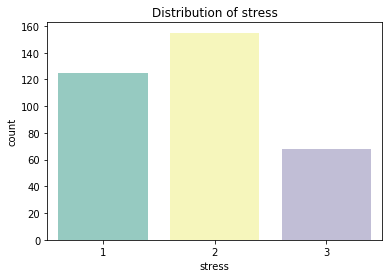

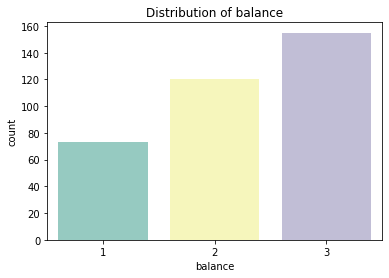

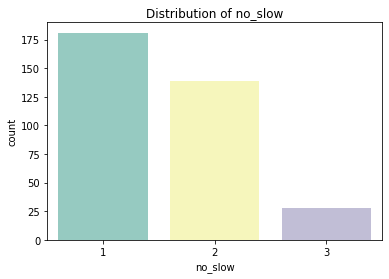

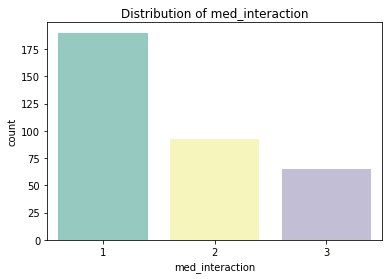

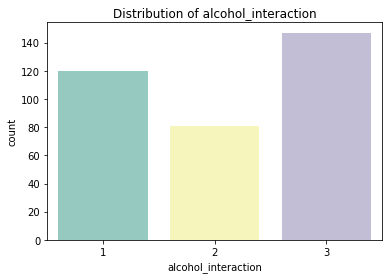

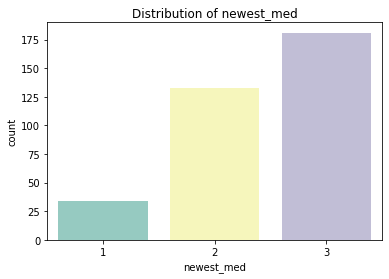

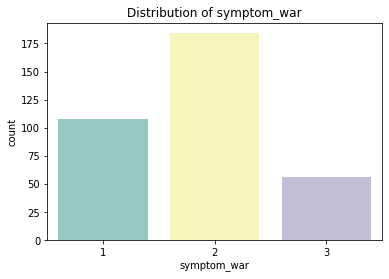

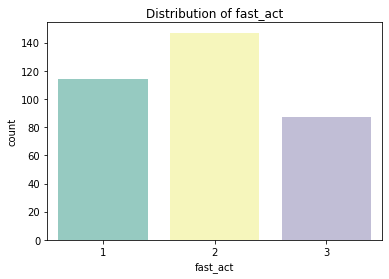

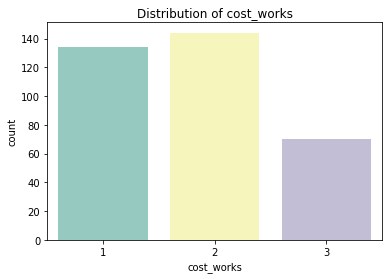

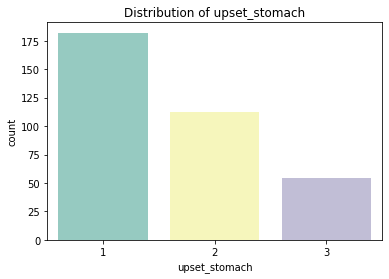

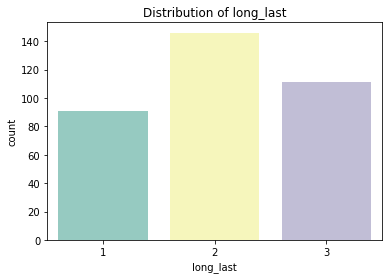

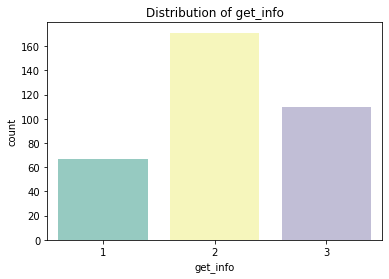

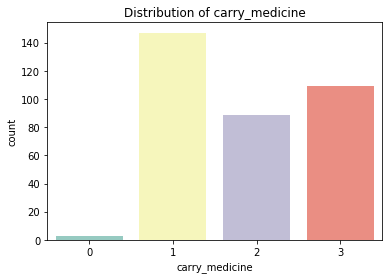

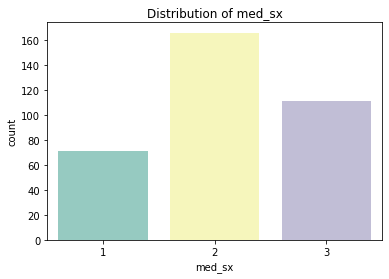

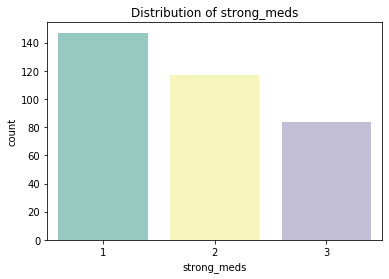

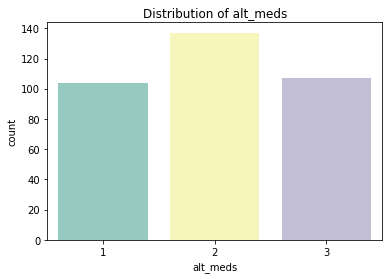

In [10]:
# replace 'No ans.', which was coded as '0', with the mode for each column

patients_rep.stress = patients_rep.stress.replace({0: 2})
patients_rep.balance = patients_rep.balance.replace({0: 3})
patients_rep.no_slow = patients_rep.no_slow.replace({0: 1})

patients_rep.med_interaction = patients_rep.med_interaction.replace({0: 1})
patients_rep.alcohol_interaction = patients_rep.alcohol_interaction.replace({0: 3})
patients_rep.newest_med = patients_rep.newest_med.replace({0: 3})

patients_rep.symptom_war = patients_rep.symptom_war.replace({0: 2})
patients_rep.fast_act = patients_rep.fast_act.replace({0: 2})
patients_rep.cost_works = patients_rep.cost_works.replace({0: 2})

patients_rep.upset_stomach = patients_rep.upset_stomach.replace({0: 1})
patients_rep.long_last = patients_rep.long_last.replace({0: 2})
patients_rep.get_info = patients_rep.get_info.replace({0: 2})

patients_rep.caryy_medicine = patients_rep.fast_act.replace({0: 1})
patients_rep.med_sx = patients_rep.med_sx.replace({0: 2})
patients_rep.strong_meds = patients_rep.strong_meds.replace({0: 1})
patients_rep.alt_meds = patients_rep.alt_meds.replace({0: 2})

# generate count plots for every column of df
for col in patients_rep.columns:
    z = sns.countplot(x=col, data=patients_rep, palette="Set3")
    r = plt.title('Distribution of {}'.format(col))
    plt.show()

Examine the correlation matrix for the data columns prior to dimension reduction.

Wall time: 228 ms


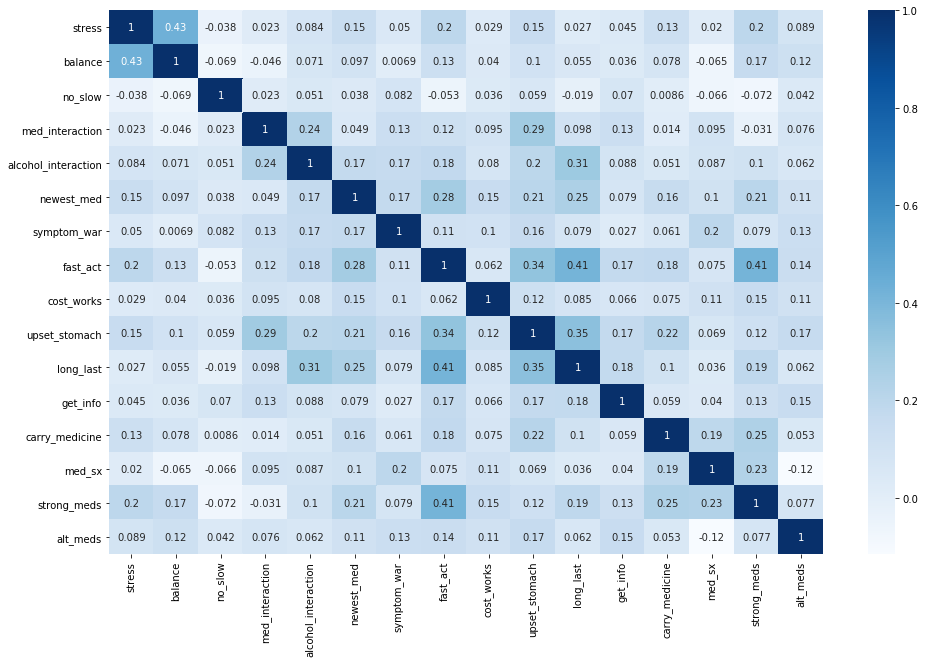

In [11]:
%%time

# examine correlation matrix for data columns
z = plt.figure(figsize=(16, 10))
tt = sns.heatmap(patients_rep.corr(), annot=True, cmap="Blues")

## 2. Dimension Reduction (PCA): <a name="2"></a>
[return to top](#home02)

It is a common practice to apply PCA prior to clustering/K-means as it improves the results by reducing noise.

PCA leads to orthogonality; orthogonal means all independent variables in the model are uncorrelated. PCA splits covariance/correlation matrix into eigenvalues (scale) and eigenvectors(direction).

### Scale Features<a name="2a"></a>

The features need to be scaled prior to applying PCA since it is effected by scale.

In [12]:
# standardize the data to have a mean of 0 & variance of 1
x = patients_rep.values
x = StandardScaler().fit_transform(x) # standardize the features

###  Eigen decomposition, covariance matrix, Eigenvector and Eigenvalues<a name="2b"></a>

The initial number of principal components examined will match the number of columns in the dataset. Visualizations are used to understand how the ordered components explain variance using a scree plot.

Explained variation per principal component: [0.18210258 0.09430157 0.08285932 0.07245101 0.06682134 0.06174396
 0.05990583 0.05607429 0.05504643 0.04748142 0.04615771 0.04416543
 0.03757682 0.03422895 0.03113077 0.02795258]
 
Wall time: 38.2 ms


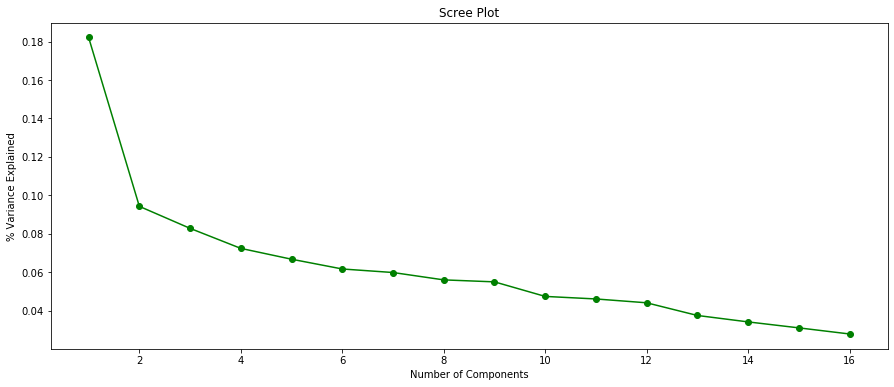

In [13]:
%%time

# initial number of principal components to examine, matching # of cols in dataset
n_com = 16 
pca_16 = PCA(n_components = n_com)
principal_components_16 = pca_16.fit_transform(x)

# how much information (variance) can be attributed to each principal components
explained_variance_ratio = pca_16.explained_variance_ratio_ 

# plot explained variance ratio w/ PCA Scree Plot (defined in next cell)
x_axis = range(1, n_com + 1)
aa = plt.figure(figsize=(15, 6))
bb = plt.plot(x_axis, explained_variance_ratio, marker = 'o', color='g')
cc = plt.xlabel('Number of Components')

dd = plt.ylabel('% Variance Explained')
kk = plt.title('Scree Plot')

print('Explained variation per principal component: {}'.format(pca_16.explained_variance_ratio_))
print(' ')

Examining the covariance matrix:
* Each element represents the covariance between 2 features
* Eigendecomposition of the covariance matrix yields the same results as eigendecomposition on the correlation matrix, if the data is standardized since the correlation matrix is the normalized covariance matrix.

The respective bullet points are supported by comparing the correlation matrix heatmap from the previous section to the below covariance matrix values. 

In [14]:
print('Covariance matrix: \n%s' %np.cov(x.T))

Covariance matrix: 
[[ 1.00288184  0.43251543 -0.0376704   0.02310605  0.08376051  0.15007648
   0.05022189  0.19717136  0.02944757  0.15093574  0.02754831  0.04542482
   0.13152676  0.0197332   0.19815723  0.08911431]
 [ 0.43251543  1.00288184 -0.06967571 -0.04572124  0.07096846  0.09747689
   0.00695883  0.12976803  0.04046103  0.10183174  0.05529259  0.03638828
   0.07871481 -0.06476466  0.16792939  0.12089234]
 [-0.0376704  -0.06967571  1.00288184  0.02349719  0.05108777  0.03834942
   0.08180451 -0.05298452  0.03561682  0.0595974  -0.01906176  0.0701098
   0.00860688 -0.06586337 -0.07218523  0.04244727]
 [ 0.02310605 -0.04572124  0.02349719  1.00288184  0.23677328  0.04924848
   0.13463268  0.12412613  0.09487285  0.2920773   0.09853826  0.13436218
   0.01364738  0.09541443 -0.03095234  0.07658477]
 [ 0.08376051  0.07096846  0.05108777  0.23677328  1.00288184  0.17238705
   0.16778056  0.17954308  0.07984244  0.20142461  0.30629392  0.08776797
   0.05102039  0.08741933  0.10348616

Eigenvalue is a number: how much variance there is on the data in a direction. 

In [15]:
print('\033[1m' + 'Eigenvalues:' + '\033[0;0m')
for eigenvalue in pca_16.explained_variance_:
    print(eigenvalue)
    
# explained_variance_ratio from above is just the proportion: (below item) / (sum of all below items)

Eigenvalues:
2.9220379931716427
1.5131732538897322
1.3295697685356533
1.1625567720955274
1.0722224752984515
0.9907502656106638
0.9612555817424074
0.899774121818834
0.8832810634633671
0.761892030032412
0.7406515980461725
0.7086833300317197
0.6029616941301494
0.5492415513183481
0.4995277729344063
0.44853023796697966


Eigenvector is a direction, specifically the direction coefficients/cosines/angle of orthogonal rotation or transformation; they are unit-scaled loadings and limit the behavior of the linear transformation. The eigenvector (unit vector) with the highest eigenvalue is the principal component

In [16]:
print('\033[1m' + 'Eigenvectors:' + '\033[0;0m')
for eigenvector in pca_16.components_:
    print(eigenvector)

Eigenvectors:
[-0.22254235 -0.17774921 -0.00828362 -0.18483541 -0.2656005  -0.3085624
 -0.19768082 -0.39642275 -0.17323767 -0.36063105 -0.33894703 -0.19915755
 -0.23254973 -0.15461896 -0.31462776 -0.17627364]
[-0.47249785 -0.51401598  0.25398422  0.39373382  0.23943825 -0.01317625
  0.22751673 -0.08530221  0.09190247  0.17510848  0.14648721  0.12617687
 -0.13275779  0.0927411  -0.2714991  -0.00538324]
[-0.17472372 -0.27054049 -0.20446371 -0.13835374 -0.09268902  0.06431012
  0.11324196  0.00728924  0.11129178 -0.16574417 -0.07009375 -0.1825399
  0.2935008   0.62243245  0.3171905  -0.39681577]
[ 0.24025239  0.18602541  0.31848675  0.09884024 -0.04656476  0.04337005
  0.46543135 -0.33186604  0.34120498 -0.04966318 -0.46613553 -0.11037365
  0.08928293  0.18835951 -0.08168704  0.25919882]
[-0.27780066 -0.22884746  0.34860832 -0.39749137 -0.39168071  0.12433411
 -0.13783903  0.08591914  0.24078919 -0.0738165   0.00266214  0.33814135
  0.1951856  -0.1476874   0.21236268  0.33599431]
[-0.0348

### Loadings <a name="2c"></a>

Loadings are eigenvectors with the information regarding magnitude/variability of rotated data.

loadings = eigenvectors * sqrt(eigenvalues); so, they also include variance because the eigenvalue component
loadings are the pearson correlation between the original variables and the principal components

In [17]:
print('\033[1m' + 'Loadings:' + '\033[0;0m')
pca_16.components_ * np.sqrt(pca_16.explained_variance_)

Loadings:


array([[-0.38041322, -0.21865127, -0.00955159, -0.1992931 , -0.27502447,
        -0.30713203, -0.19381348, -0.37603245, -0.16281402, -0.31478195,
        -0.2917016 , -0.16765746, -0.18057628, -0.1145894 , -0.22237034,
        -0.11805469],
       [-0.80768638, -0.63229675,  0.29286152,  0.42453139,  0.24793394,
        -0.01311517,  0.22306569, -0.08091463,  0.08637273,  0.15284594,
         0.12606853,  0.10621989, -0.10308723,  0.0687312 , -0.19188818,
        -0.00360528],
       [-0.2986722 , -0.33279485, -0.23576091, -0.14917566, -0.09597779,
         0.064012  ,  0.11102654,  0.00691432,  0.10459539, -0.14467216,
        -0.06032346, -0.15366817,  0.22790516,  0.46128987,  0.22418162,
        -0.26575705],
       [ 0.41068671,  0.22883192,  0.36723742,  0.10657145, -0.04821696,
         0.04316901,  0.45632585, -0.31479626,  0.32067479, -0.04334921,
        -0.40116144, -0.09291621,  0.06932874,  0.1395948 , -0.05773418,
         0.17359167],
       [-0.4748716 , -0.28150779,  0

In [18]:
# print the eigen pairs, given all 16 principal components
print('\033[1m' + 'Eigen pairs, given all 16 principal components:' + '\033[0;0m')
eigenvalues, eigenvectors = np.linalg.eig(np.cov(x.T)) # using np here
eigenpairs = [(np.abs(eigenvalues[a]), eigenvectors[:,a]) for a in range(len(eigenvalues))]
eigenpairs.sort(reverse=True)
eigenpairs[:3] # pring first 3 only

Eigen pairs, given all 16 principal components:


[(2.9220379931716387,
  array([-0.22254235, -0.17774921, -0.00828362, -0.18483541, -0.2656005 ,
         -0.3085624 , -0.19768082, -0.39642275, -0.17323767, -0.36063105,
         -0.33894703, -0.19915755, -0.23254973, -0.15461896, -0.31462776,
         -0.17627364])),
 (1.5131732538897322,
  array([ 0.47249785,  0.51401598, -0.25398422, -0.39373382, -0.23943825,
          0.01317625, -0.22751673,  0.08530221, -0.09190247, -0.17510848,
         -0.14648721, -0.12617687,  0.13275779, -0.0927411 ,  0.2714991 ,
          0.00538324])),
 (1.329569768535656,
  array([ 0.17472372,  0.27054049,  0.20446371,  0.13835374,  0.09268902,
         -0.06431012, -0.11324196, -0.00728924, -0.11129178,  0.16574417,
          0.07009375,  0.1825399 , -0.2935008 , -0.62243245, -0.3171905 ,
          0.39681577]))]

There is signs mismatch at times but that's expected since sklearn pca provides entries of an eigenvectors row-wise, whereas `np.linalg.eig()` provides them column-wise; so, negative version of eigenvector is same eigenvector and this verifies 100% match.

In [19]:
abs(eigenvectors.T.round(10)).all() == abs(pca_16.components_.round(10)).all() # all values must be truthy

True

### Determine the Number of Factors to Retain<a name="2d"></a>

The first 12 components include ~ 90% of the information, starting with an index of 0. The below visualization illustrates how the first 12 components explain ~ 90 % of the variance.

array([ 2.92203799,  4.43521125,  5.76478102,  6.92733779,  7.99956026,
        8.99031053,  9.95156611, 10.85134023, 11.7346213 , 12.49651333,
       13.23716492, 13.94584825, 14.54880995, 15.0980515 , 15.59757927,
       16.04610951])

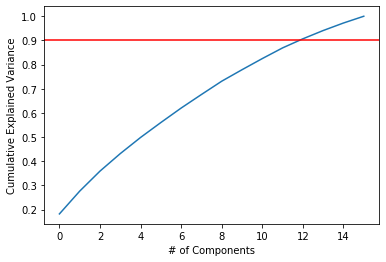

In [20]:
# explained variance is to define the squared-length of the vector when plotting
np.cumsum(pca_16.explained_variance_) # cumulative amount of variance only

ee = plt.plot(np.cumsum(pca_16.explained_variance_ratio_)) # cumulative % of variance explained -- most understandable
gg = plt.xlabel('# of Components')
pp = plt.ylabel('Cumulative Explained Variance')
ss = plt.axhline(y=0.9, color='r')

Therefore, create pca dataset with only # of components that explain ~90% of variance

In [21]:
%%time

n_com_2 = 12
pca_12 = PCA(n_components = n_com_2)
pca_result_12 = pca_12.fit_transform(x)

# create df
data_pca_12 = pd.DataFrame(pca_result_12)

# add cols
l = range(1, n_com_2 + 1)
cols = []

for i in l:
    cols.append('pca_' + str(i))

data_pca_12.columns = cols

# note: no particular meaning assigned to each principal component; they represent the main dimensions of variation
data_pca_12.head(3)

Wall time: 1.75 ms


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12
0,-1.854777,-1.376429,2.512825,-0.651093,-1.474617,2.107481,-0.237681,-1.156228,-0.547460,-0.734455,-0.103127,-0.299540
1,2.423179,0.808538,1.439958,-0.212792,-1.082334,1.622614,0.030276,-0.707338,0.507164,-0.331943,1.409300,0.894734
2,-0.089059,-0.408367,0.420012,0.077928,0.574032,0.746301,0.233240,0.470031,-0.938749,-1.841096,-0.625047,-0.146785


Plot of the first two principal components with no cluster labels/predictions yet.

70.0 % information loss when only consdiering first two principal components


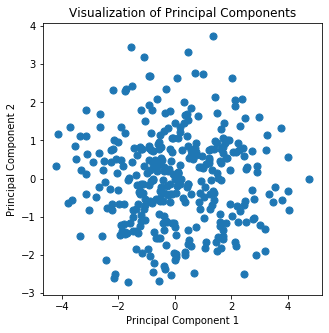

In [22]:
oa = plt.figure(figsize=(5,5))
oy = plt.xlabel('Principal Component 1')
oz = plt.ylabel('Principal Component 2')
op = plt.title('Visualization of Principal Components')
bv = plt.scatter(data_pca_12.pca_1, data_pca_12.pca_2, s = 50)

print((1-round(pca_16.explained_variance_ratio_[0] + pca_16.explained_variance_ratio_[1],1))*100, 
      '% information loss when only consdiering first two principal components')
# so, when projecting 16 dimensions to 2 dimensions

In [23]:
%%time

eigenvectors_df = pd.DataFrame(pca_12.components_, columns=patients_rep.columns)
eigenvectors_df = eigenvectors_df.abs()
eigenvectors_df.head(12)

Wall time: 0 ns


,stress,balance,no_slow,med_interaction,alcohol_interaction,newest_med,symptom_war,fast_act,cost_works,upset_stomach,long_last,get_info,carry_medicine,med_sx,strong_meds,alt_meds
0,0.222542,0.177749,0.008284,0.184835,0.265600,0.308562,0.197681,0.396423,0.173238,0.360631,0.338947,0.199158,0.232550,0.154619,0.314628,0.176274
1,0.472498,0.514016,0.253984,0.393734,0.239438,0.013176,0.227517,0.085302,0.091902,0.175108,0.146487,0.126177,0.132758,0.092741,0.271499,0.005383
2,0.174724,0.270540,0.204464,0.138354,0.092689,0.064310,0.113242,0.007289,0.111292,0.165744,0.070094,0.182540,0.293501,0.622432,0.317191,0.396816
3,0.240252,0.186025,0.318487,0.098840,0.046565,0.043370,0.465431,0.331866,0.341205,0.049663,0.466136,0.110374,0.089283,0.188360,0.081687,0.259199
4,0.277801,0.228847,0.348608,0.397491,0.391681,0.124334,0.137839,0.085919,0.240789,0.073816,0.002662,0.338141,0.195186,0.147687,0.212363,0.335994
5,0.034828,0.002486,0.356271,0.418711,0.239371,0.441461,0.223962,0.048631,0.082576,0.129191,0.234587,0.485780,0.129668,0.183912,0.053361,0.154325
6,0.172328,0.009755,0.539393,0.038176,0.041970,0.119237,0.099726,0.031492,0.514477,0.212985,0.072544,0.118415,0.471344,0.070741,0.084667,0.295327
7,0.110588,0.156757,0.281979,0.065256,0.214609,0.007265,0.471615,0.158851,0.580221,0.069217,0.066761,0.143396,0.102950,0.002674,0.025685,0.455994
8,0.078665,0.074828,0.155396,0.136543,0.204842,0.073640,0.242240,0.036456,0.282039,0.389522,0.030995,0.543026,0.450567,0.223366,0.231438,0.066720
9,0.173041,0.042915,0.027440,0.151563,0.607927,0.484754,0.090027,0.110194,0.012362,0.196445,0.053114,0.150841,0.337871,0.044087,0.194059,0.318755


The below lists the eigenvectors for each of the 12 principal components. Across each question,
no vector will get stretched as much as the eigenvector corresponding to the abs(maximum) eigenvalue. Eigenvalues are devoid of variance/load, so this is not as informative as examining the loadings. This information is included for information purposes only.

In [24]:
%%time

for i in range(12): # corresponds to the 12 principal components/rows in above table
    a = eigenvectors_df.iloc[i,:].sort_values(ascending=False)[:5] # list top 5 vectors in descending order per component
    print("component {}".format(i+1))
    print(a)
    print(" ")

component 1
fast_act         0.396423
upset_stomach    0.360631
long_last        0.338947
strong_meds      0.314628
newest_med       0.308562
Name: 0, dtype: float64
 
component 2
balance            0.514016
stress             0.472498
med_interaction    0.393734
strong_meds        0.271499
no_slow            0.253984
Name: 1, dtype: float64
 
component 3
med_sx            0.622432
alt_meds          0.396816
strong_meds       0.317191
carry_medicine    0.293501
balance           0.270540
Name: 2, dtype: float64
 
component 4
long_last      0.466136
symptom_war    0.465431
cost_works     0.341205
fast_act       0.331866
no_slow        0.318487
Name: 3, dtype: float64
 
component 5
med_interaction        0.397491
alcohol_interaction    0.391681
no_slow                0.348608
get_info               0.338141
alt_meds               0.335994
Name: 4, dtype: float64
 
component 6
get_info               0.485780
newest_med             0.441461
med_interaction        0.418711
no_slow          

The "load" includes information on the amount of variance; since principal components are used to explain variance of 
the variables, it makes more sense to use loadings than eigenvectors.

When multiplying the  eigenvector by sqrt(eigenvalue), we load/scale the bare coefficient by amount of variance; we make the coefficient to be measure of association/co-variability

In [25]:
%%time

loadings = pca_16.components_ * np.sqrt(pca_16.explained_variance_)

loadings_df = pd.DataFrame(loadings, columns=patients_rep.columns)
loadings_df = loadings_df.abs()
loadings_df.head(12)

Wall time: 860 µs


,stress,balance,no_slow,med_interaction,alcohol_interaction,newest_med,symptom_war,fast_act,cost_works,upset_stomach,long_last,get_info,carry_medicine,med_sx,strong_meds,alt_meds
0,0.380413,0.218651,0.009552,0.199293,0.275024,0.307132,0.193813,0.376032,0.162814,0.314782,0.291702,0.167657,0.180576,0.114589,0.222370,0.118055
1,0.807686,0.632297,0.292862,0.424531,0.247934,0.013115,0.223066,0.080915,0.086373,0.152846,0.126069,0.106220,0.103087,0.068731,0.191888,0.003605
2,0.298672,0.332795,0.235761,0.149176,0.095978,0.064012,0.111027,0.006914,0.104595,0.144672,0.060323,0.153668,0.227905,0.461290,0.224182,0.265757
3,0.410687,0.228832,0.367237,0.106571,0.048217,0.043169,0.456326,0.314796,0.320675,0.043349,0.401161,0.092916,0.069329,0.139595,0.057734,0.173592
4,0.474872,0.281508,0.401970,0.428583,0.405578,0.123758,0.135142,0.081500,0.226301,0.064432,0.002291,0.284659,0.151563,0.109452,0.150092,0.225023
5,0.059535,0.003059,0.410805,0.451462,0.247864,0.439414,0.219580,0.046129,0.077607,0.112766,0.201888,0.408946,0.100688,0.136299,0.037714,0.103355
6,0.294577,0.011999,0.621958,0.041163,0.043459,0.118684,0.097775,0.029872,0.483521,0.185907,0.062432,0.099686,0.366001,0.052427,0.059841,0.197788
7,0.189039,0.192829,0.325142,0.070360,0.222224,0.007231,0.462388,0.150681,0.545309,0.060417,0.057455,0.120715,0.079942,0.001982,0.018154,0.305390
8,0.134469,0.092046,0.179182,0.147223,0.212110,0.073299,0.237501,0.034581,0.265069,0.340000,0.026674,0.457137,0.349868,0.165539,0.163574,0.044684
9,0.295796,0.052790,0.031640,0.163418,0.629498,0.482507,0.088266,0.104526,0.011618,0.171470,0.045711,0.126983,0.262359,0.032673,0.137156,0.213478


The below lists the loadings for each of the 12 principal components, across each question.

Factor loading equals the correlation coefficient for the variable & factor; it shows variance explained by the variable on that particular factor

`loading matrix`: vertical SS are eigenvalues/components variances; horizontal SS are portions of variables' variances 
being explained by the components.

In [26]:
%%time

for i in range(12): # corresponds to the 12 principal components/rows in above table
    a = loadings_df.iloc[i,:].sort_values(ascending=False)[:5] # list top 5 loadings in descending order per component
    print("component {}".format(i+1))
    print(a)
    print(" ")

component 1
stress           0.380413
fast_act         0.376032
upset_stomach    0.314782
newest_med       0.307132
long_last        0.291702
Name: 0, dtype: float64
 
component 2
stress                 0.807686
balance                0.632297
med_interaction        0.424531
no_slow                0.292862
alcohol_interaction    0.247934
Name: 1, dtype: float64
 
component 3
med_sx      0.461290
balance     0.332795
stress      0.298672
alt_meds    0.265757
no_slow     0.235761
Name: 2, dtype: float64
 
component 4
symptom_war    0.456326
stress         0.410687
long_last      0.401161
no_slow        0.367237
cost_works     0.320675
Name: 3, dtype: float64
 
component 5
stress                 0.474872
med_interaction        0.428583
alcohol_interaction    0.405578
no_slow                0.401970
get_info               0.284659
Name: 4, dtype: float64
 
component 6
med_interaction        0.451462
newest_med             0.439414
no_slow                0.410805
get_info               0.40

Use of a heatmap to visualize the above loadings helps interpret principal components because they are weights/coefficients whereby unit-scaled components load a variable

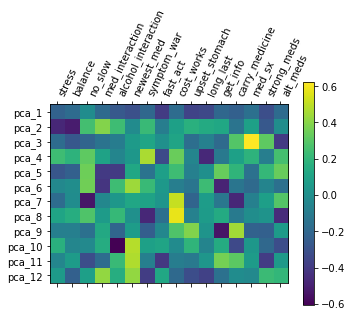

In [27]:
tt = plt.matshow(pca_12.components_,cmap='viridis')
tu = plt.yticks(range(0,12),data_pca_12.columns,fontsize=10)
tp = plt.xticks(range(len(patients_rep.columns)),patients_rep.columns,rotation=65,ha='left')
tq = plt.colorbar()

## 3. Clustering (K-Means): <a name="3"></a>
[return to top](#home03)

K-Means minimizes within-cluster variance (squared Euclidean distance). 
<br>
K-Medians minimizes absolute deviations (Manhattan distance).

### Determine the Number of Clusters <a name="3a"></a>

Leverage elbow method to determine appropriate number of clusters.

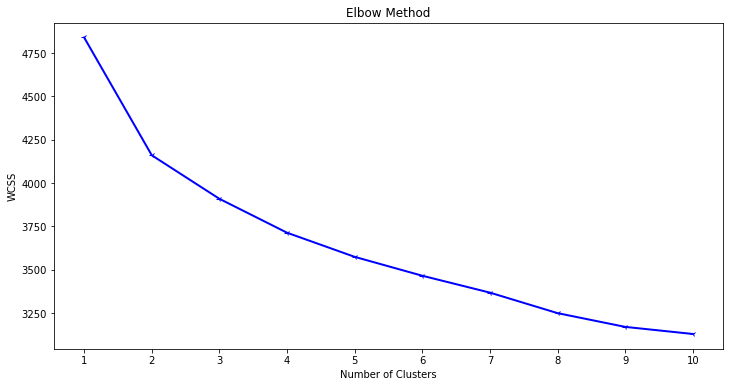

Wall time: 577 ms


[4839.209344046594,
 4160.202715049497,
 3909.1975998942244,
 3713.7533919889793,
 3574.653377073212,
 3465.762560300559,
 3368.4388213522534,
 3250.1808950970612,
 3170.9284548207074,
 3130.123682753003]

In [28]:
%%time

wcss = [] # instantiate list to store WCSS for different values of k

for k in range(1,11):
    # K-Means instance with k-clusters
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca_12) # fit model to sample
    wcss.append(kmeans.inertia_) # append inertia to list of WCSS/inertias

    
aa = plt.figure(figsize=(12,6))    
bb = plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker ="3")

cc = plt.xlabel("Number of Clusters")
dd = plt.xticks(np.arange(1,11,1))

ee = plt.ylabel("WCSS")
plt.title('Elbow Method')
plt.show()

wcss # inertia for different number of clusters

# 

Wall time: 69 ms


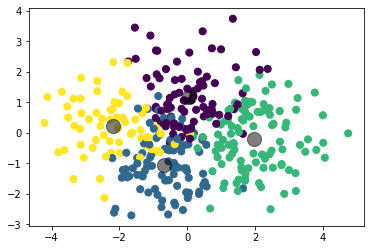

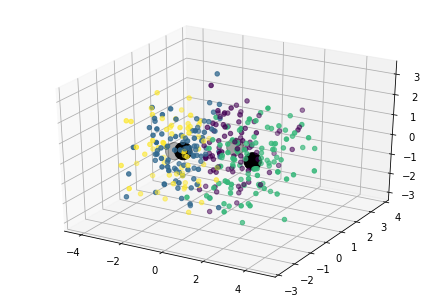

In [29]:
%%time

# applying kmeans to the dataset / creating the kmeans classifier w/ # of clusters identified above (unclear)
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(data_pca_12)

# visualize 4 clusters -- looks ok but too much cluster overlap
z = data_pca_12.values
ry = plt.scatter(z[:, 0], z[:, 1], c=y_kmeans2, s=50, cmap='viridis')
centers = kmeans2.cluster_centers_
ro = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# same plot but in 3D
fig = plt.figure()
ax = Axes3D(fig)
ot = ax.scatter(z[:, 0], z[:, 1], z[:, 2], c = y_kmeans2)
rb = ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='o', c='black', s=300)

4 is where the elbow seems to be at, but it's a littler hard to tell so will also compute silhouette score.

Examine silhoutte score for 4 clusters, which is the separation distance between clusters; range [-1,1].
It shows how close each point in one cluster is to points in the neighboring. It's an avg. for all samples.

In [30]:
%%time

labels = kmeans2.labels_ # cluster each sample belongs to
print('Silhouette score is: ', round(metrics.silhouette_score(z, labels, metric = 'euclidean'),2))

# compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(z, labels)
print('Number of Silhouette values: ', len(sample_silhouette_values)) # should do so for all 348 values
print(" ")

# examine variance ratio criterion/CH score: ratio between the within-cluster dispersion & betw.-cluster dispersion
print('Calinski & Harabasz (CH) criterion: ', round(metrics.calinski_harabasz_score(z, labels),1))
print(' ')
print(' ')

Silhouette score is:  0.09
Number of Silhouette values:  348
 
Calinski & Harabasz (CH) criterion:  34.7
 
 
Wall time: 9.26 ms


Since the results for 4 clusters wasn't great, examine varying numbers of clusters. 2 clusters seems promising as the below visual results demonstrate, along with the higher silhouette score.

For n_clusters = 2, silhouette score is 0.12554406266502374 and CH score is 56.47231871252701)
For n_clusters = 3, silhouette score is 0.09894168280433682 and CH score is 41.03835167365925)
For n_clusters = 4, silhouette score is 0.08866377507750947 and CH score is 34.749825548726)
For n_clusters = 5, silhouette score is 0.08500339916415803 and CH score is 30.33459827558175)
For n_clusters = 6, silhouette score is 0.08177447830439424 and CH score is 27.106230843489122)
For n_clusters = 7, silhouette score is 0.08011317899154144 and CH score is 24.815291536027313)


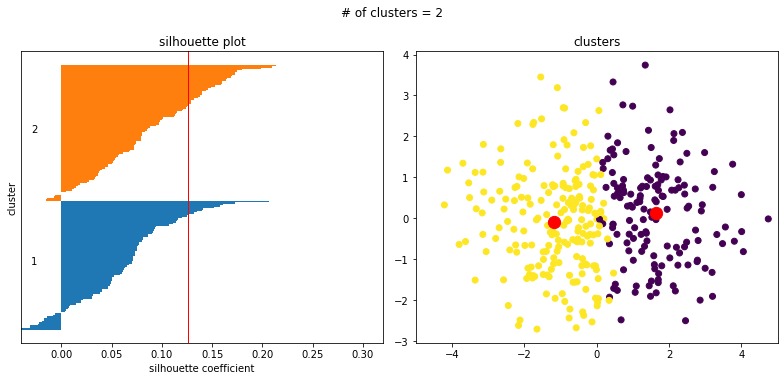

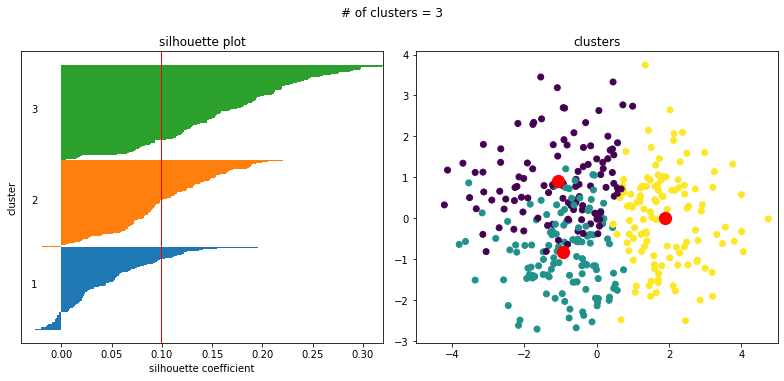

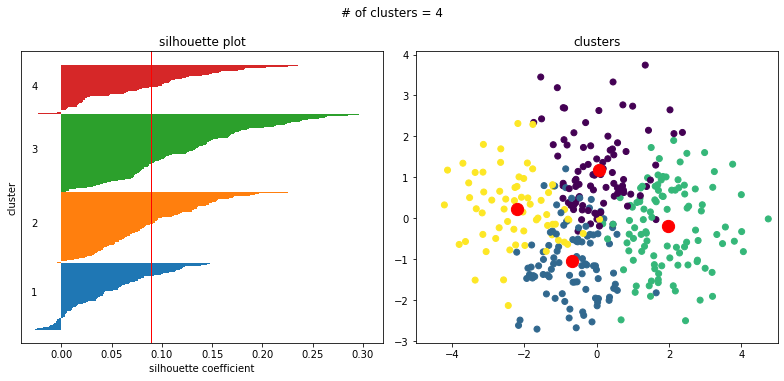

In [31]:
n_clusters_range = list(range(2,8))

for n_clusts in n_clusters_range:
    kmeans = KMeans(n_clusters = n_clusts, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    predictions = kmeans.fit_predict(data_pca_12)
    centroids = kmeans.cluster_centers_
    
    sil_score = metrics.silhouette_score(z, predictions, metric = 'euclidean')
    ch_score = metrics.calinski_harabasz_score(z, predictions) # for the CH score, the higher the value, better soln.
    print("For n_clusters = {}, silhouette score is {} and CH score is {})".format(n_clusts, sil_score, ch_score))
    
# silhouette coefficients near +1 indicate sample far away from neighboring clusters
# 0 indicates sample very close to decision boundary clusters; neg. values indicate incorrect cluster


# silhouette plots
for a, b in enumerate([2, 3, 4]):
    fig,(ax1, ax2) = plt.subplots(1, 2)
    tt = fig.set_size_inches(11, 5)
    
    # Run the Kmeans algorithm
    kmeans = KMeans(n_clusters = b, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    predictions = kmeans.fit_predict(z)
    centroids = kmeans.cluster_centers_

    # compute silhouette samples
    sil_values = silhouette_samples(z, predictions)

    # silhouette plot
    y_ticks = []
    y_low, y_up = 0, 0
    
    for a, q in enumerate(np.unique(predictions)):
        cluster_sil_values = sil_values[labels == q]
        cluster_sil_values.sort()
        y_up += len(cluster_sil_values)
        gi = ax1.barh(range(y_low, y_up), cluster_sil_values, edgecolor='none', height=1)
        gb = ax1.text(-0.03, (y_low + y_up) / 2, str(a + 1))
        y_low += len(cluster_sil_values)

    # plot avg silhouette score
    avg_score = np.mean(sil_values)
    rr = ax1.axvline(avg_score, linestyle='-', linewidth=1, color='red')
    ri = ax1.set_yticks([])
    ry = ax1.set_xlim([-0.04,0.32])
    
    rp = ax1.set_xlabel('silhouette coefficient')
    rh = ax1.set_ylabel('cluster')
    gh = ax1.set_title('silhouette plot', y = 1)
    
    # plot clusters
    en = ax2.scatter(z[:, 0], z[:, 1], c = predictions)
    et = ax2.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='r', s=150)
    qe = ax2.set_xlim([-5, 5])
    cr = ax2.set_xlim([-5, 5])
    
    ww = ax2.set_title('clusters', y = 1)
    plt.tight_layout()
    ww = plt.suptitle(f'# of clusters = {b}', y = 1.05);

### Evaluate Cluster Integrity <a name="3b"></a>

Split data, fit and predict on train date and use to determine if unseen test data still maintains visual separation and equivalent silhouette scores. 

In [32]:
%%time

# import library
from sklearn.model_selection import train_test_split

# adding a seed called random_state in train_test_split so that split is reproducible
random_state = 7

# build out the following: X_train, X_test
X_train, X_test = train_test_split(data_pca_12, test_size=0.20, random_state=random_state)

print('X_train size: {}'.format(X_train.size))
print('X_test size: {}'.format(X_test.size))
print(' ')
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print(' ')

X_train size: 3336
X_test size: 840
 
X_train shape: (278, 12)
X_test shape: (70, 12)
 
Wall time: 1.99 ms


In [33]:
%%time

kmeans3 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans3.fit_predict(data_pca_12)
y_train = kmeans3.fit_predict(X_train)
y_test = kmeans3.predict(X_test)

# combine 2 clusters predicted with original df to see which cluster each patient was slotted into
patients_original = data_copy.reset_index()
patients_original = patients_original.drop(['index'], axis = 1)

clusters_df = pd.DataFrame(y)
clusters_df.columns = ['cluster_predicted']

clusters_train_df = pd.DataFrame(y_train)
clusters_train_df.columns = ['cluster_predicted']

clusters_test_df = pd.DataFrame(y_test)
clusters_test_df.columns = ['cluster_predicted']

combined_df = pd.concat([patients_original, clusters_df], axis = 1)

# merge performs a default inner join and done on index to pickup predicted against correct patient row
combined_train_df = pd.merge(patients_original, clusters_train_df, left_index=True, right_index=True)
combined_test_df = pd.merge(patients_original, clusters_test_df, left_index=True, right_index=True)

print('cluster_train_df shape: {}'.format(clusters_train_df.shape))
print('clusters_test_df shape: {}'.format(clusters_test_df.shape))
print(' ')
print('combined_train_df shape: {}'.format(combined_train_df.shape))
print('combined_test_df shape: {}'.format(combined_test_df.shape))
print(' ')

cluster_train_df shape: (278, 1)
clusters_test_df shape: (70, 1)
 
combined_train_df shape: (278, 18)
combined_test_df shape: (70, 18)
 
Wall time: 56.9 ms


Train data cluster visualization.

,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine,cluster_predicted
275,271688.0,3_to_4,5_to_6,1_to_2,1_to_2,3_to_4,3_to_4,3_to_4,5_to_6,1_to_2,1_to_2,1_to_2,3_to_4,1_to_2,3_to_4,5_to_6,3_to_4,0
276,273205.0,1_to_2,3_to_4,3_to_4,1_to_2,1_to_2,3_to_4,3_to_4,3_to_4,3_to_4,1_to_2,3_to_4,3_to_4,1_to_2,3_to_4,1_to_2,3_to_4,0
277,273460.0,3_to_4,5_to_6,1_to_2,3_to_4,1_to_2,5_to_6,5_to_6,5_to_6,1_to_2,1_to_2,5_to_6,1_to_2,5_to_6,5_to_6,5_to_6,3_to_4,0


,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine,cluster_predicted
0,1128.0,3_to_4,5_to_6,1_to_2,1_to_2,5_to_6,5_to_6,5_to_6,5_to_6,1_to_2,1_to_2,5_to_6,1_to_2,5_to_6,5_to_6,5_to_6,1_to_2,1
1,1836.0,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,5_to_6,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,3_to_4,3_to_4,1_to_2,1_to_2,1
2,2379.0,1_to_2,5_to_6,3_to_4,1_to_2,5_to_6,3_to_4,3_to_4,3_to_4,3_to_4,1_to_2,3_to_4,3_to_4,3_to_4,3_to_4,5_to_6,3_to_4,1


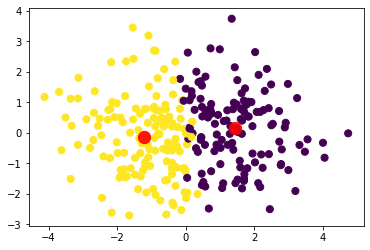

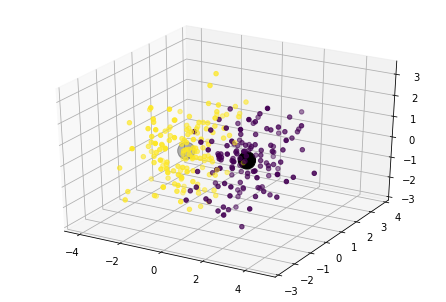

In [34]:
l = X_train.values
ry = plt.scatter(l[:, 0], l[:, 1], c=y_train, s=50, cmap='viridis')
centers2 = kmeans3.cluster_centers_
vv = plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=150, alpha=0.9)

# same plot but in 3D
fig = plt.figure()
ax = Axes3D(fig)
ot = ax.scatter(l[:, 0], l[:, 1], l[:, 2], c = y_train)
rb = ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], marker='o', c='black', s=300)

combined_train_df.tail(3)
combined_train_df.head(3)

Train data silhouette scores. 

In [35]:
%%time

# examine silhoutte score for 2 clusters, which is the separation distance between clusters; range [-1,1]
# shows how close each point in one cluster is to points in the neighboring -- it's an avg. for all samples 
labels = kmeans3.labels_ # cluster each sample belongs to
print('Silhouette score is: ', round(metrics.silhouette_score(l, labels, metric = 'euclidean'),2))

# compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(l, labels)
print('Number of Silhouette values: ', len(sample_silhouette_values)) # should do so for all 348 values
print(" ")

# examine variance ratio criterion/CH score: ratio between the within-cluster dispersion & betw.-cluster dispersion
print('Calinski & Harabasz (CH) criterion: ', round(metrics.calinski_harabasz_score(l, labels),1))
print(' ')
print(' ')

Silhouette score is:  0.12
Number of Silhouette values:  278
 
Calinski & Harabasz (CH) criterion:  42.2
 
 
Wall time: 6.77 ms


Test data cluster visualization.

,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine,cluster_predicted
67,58237.0,5_to_6,5_to_6,1_to_2,1_to_2,1_to_2,1_to_2,3_to_4,1_to_2,1_to_2,1_to_2,3_to_4,5_to_6,1_to_2,5_to_6,1_to_2,3_to_4,1
68,58755.0,1_to_2,1_to_2,3_to_4,5_to_6,No ans.,No ans.,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,No ans.,5_to_6,1_to_2,3_to_4,0
69,58808.0,1_to_2,1_to_2,3_to_4,5_to_6,5_to_6,5_to_6,5_to_6,5_to_6,1_to_2,5_to_6,3_to_4,3_to_4,1_to_2,1_to_2,1_to_2,5_to_6,0


,ID,Constantly under stress,Stuggle with work-life balance,Symptoms don't slow me down,Concerned about interaction of medicine w/Rx,Concerned about interaction of medicine w/alcohol,Lookout for newest medicine,Waging war on symptoms,Need Fast acting medicine,Don't care about cost if works,Medicine that won't upset stomach,Need long lasting affect,Get info on different medicine from family and friends,Carry medicince everywhere,Medicine at first sign of symptoms,Need strong medicine,Interested in all alternate medicine,cluster_predicted
0,1128.0,3_to_4,5_to_6,1_to_2,1_to_2,5_to_6,5_to_6,5_to_6,5_to_6,1_to_2,1_to_2,5_to_6,1_to_2,5_to_6,5_to_6,5_to_6,1_to_2,1
1,1836.0,1_to_2,1_to_2,1_to_2,1_to_2,5_to_6,5_to_6,3_to_4,1_to_2,1_to_2,1_to_2,1_to_2,1_to_2,3_to_4,3_to_4,1_to_2,1_to_2,1
2,2379.0,1_to_2,5_to_6,3_to_4,1_to_2,5_to_6,3_to_4,3_to_4,3_to_4,3_to_4,1_to_2,3_to_4,3_to_4,3_to_4,3_to_4,5_to_6,3_to_4,1


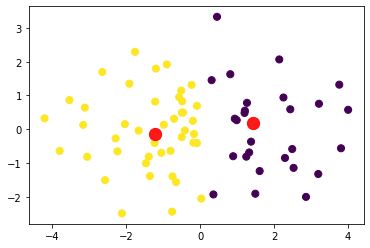

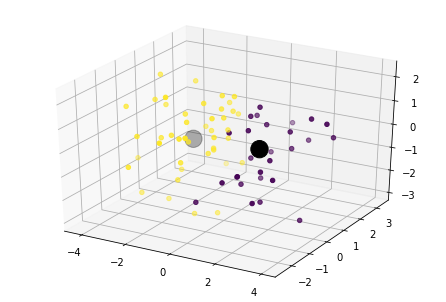

In [36]:
l2 = X_test.values
ry = plt.scatter(l2[:, 0], l2[:, 1], c=y_test, s=50, cmap='viridis')
centers2 = kmeans3.cluster_centers_
vv = plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=150, alpha=0.9)

# same plot but in 3D
fig = plt.figure()
ax = Axes3D(fig)
ot = ax.scatter(l2[:, 0], l2[:, 1], l2[:, 2], c = y_test)
rb = ax.scatter(centers2[:, 0], centers2[:, 1], centers2[:, 2], marker='o', c='black', s=300)

combined_test_df.tail(3)
combined_test_df.head(3)

Test data silhouette scores. 

In [37]:
%%time

# examine silhoutte score for 2 clusters, which is the separation distance between clusters; range [-1,1]
# shows how close each point in one cluster is to points in the neighboring -- it's an avg. for all samples 
labels = y_test # cluster each sample belongs to
print('Silhouette score is: ', round(metrics.silhouette_score(l2, labels, metric = 'euclidean'),2))

# compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(l2, labels)
print('Number of Silhouette values: ', len(sample_silhouette_values)) # should do so for all 348 values
print(" ")

# examine variance ratio criterion/CH score: ratio between the within-cluster dispersion & betw.-cluster dispersion
print('Calinski & Harabasz (CH) criterion: ', round(metrics.calinski_harabasz_score(l2, labels),1))
print(' ')
print(' ')

Silhouette score is:  0.15
Number of Silhouette values:  70
 
Calinski & Harabasz (CH) criterion:  15.4
 
 
Wall time: 3.99 ms


## 4. Market Segmentation: <a name="4"></a>
[return to top](#home04)

### Segment Counts and Question Statistics <a name="4a"></a>

In [38]:
# default outer join
# combined_df = pd.concat([combined_train_df, combined_test_df])
# combined_df = combined_df.sort_index(axis = 0)

# clusters_df = pd.concat([clusters_train_df, clusters_test_df])
# combined_df = combined_df.sort_index(axis = 0)

print('combined_train_df shape: {}'.format(combined_train_df.shape))
print('combined_test_df shape: {}'.format(combined_test_df.shape))
print('combined_df shape: {}'.format(combined_df.shape))
print(' ')
print('clusters_train_df shape: {}'.format(clusters_train_df.shape))
print('clusters_test_df shape: {}'.format(clusters_test_df.shape))
print('clusters_df shape: {}'.format(clusters_df.shape))
print(' ')

combined_train_df shape: (278, 18)
combined_test_df shape: (70, 18)
combined_df shape: (348, 18)
 
clusters_train_df shape: (278, 1)
clusters_test_df shape: (70, 1)
clusters_df shape: (348, 1)
 


In [39]:
%%time

# get summary statistics by group
print(combined_df['cluster_predicted'].value_counts()) # cluster 1 has 44 more members

1    202
0    146
Name: cluster_predicted, dtype: int64
Wall time: 1.99 ms


In [40]:
%%time

print('patients_rep shape: {}'.format(patients_rep.shape))
print(' ')

combined_digits_df = pd.concat([patients_rep, clusters_df], axis = 1)
print('combined_digits_df shape: {}'.format(combined_digits_df.shape))

patients_rep shape: (348, 16)
 
combined_digits_df shape: (348, 17)
Wall time: 997 µs


In [41]:
print(' ')
print('\033[1m' + 'mean' + '\033[0;0m')
print(combined_digits_df.mean())
print(' ')
print('\033[1m' + 'median' + '\033[0;0m')
print(combined_digits_df.median())

 
mean
stress                 1.836207
balance                2.235632
no_slow                1.560345
med_interaction        1.640805
alcohol_interaction    2.077586
newest_med             2.422414
symptom_war            1.850575
fast_act               1.922414
cost_works             1.816092
upset_stomach          1.632184
long_last              2.057471
get_info               2.123563
carry_medicine         1.873563
med_sx                 2.114943
strong_meds            1.818966
alt_meds               2.008621
cluster_predicted      0.580460
dtype: float64
 
median
stress                 2.0
balance                2.0
no_slow                1.0
med_interaction        1.0
alcohol_interaction    2.0
newest_med             3.0
symptom_war            2.0
fast_act               2.0
cost_works             2.0
upset_stomach          1.0
long_last              2.0
get_info               2.0
carry_medicine         2.0
med_sx                 2.0
strong_meds            2.0
alt_meds            

### Segment Evaluation<a name="4b"></a>

Mean and Median values per segment by question reveals a few insights:
* On average, one of the groups is under more stress & struggling more with work-life balance.
* Conversely, the other group is significantly more concerned with the interaction of their medicine with alcohol and want quick relief while also interested in the newest medication.
* And that group wants long-lasting relief, strong medicine, and doesn't want their stomachs to be upset.

In [42]:
%%time

# overlay L, A, N, B details along with original questions

final_df = combined_digits_df.copy()

final_df.rename(columns={'stress': 'L_Constantly under stress',
                        'balance': 'L_Stuggle with work-life balance',
                        'no_slow': 'A_Symptoms don\'t slow me down',
                        'med_interaction': 'A_Concerned about interaction of medicine w/Rx',
                        'alcohol_interaction': 'A_oncerned about interaction of medicine w/alcohol',
                        'newest_med': 'B_Lookout for newest medicine',
                        'symptom_war': 'B_Waging war on symptoms',
                        'fast_act': 'N_Need Fast acting medicine',
                         'cost_works': 'A_Don\'t care about cost if works',
                         'upset_stomach': 'N_Medicine that won\'t upset stomach',
                        'long_last': 'N_Need long lasting affect',
                        'get_info': 'B_Get info on different medicine from family and friends',
                        'carry_medicine': 'B_Carry medicince everywhere',
                        'med_sx': 'B_Medicine at first sign of symptoms',
                        'strong_meds': 'N_Need strong medicine',
                        'alt_meds': 'A_Interested in all alternate medicine'}, 
                inplace=True)

final_df.head(3)

Wall time: 998 µs


,L_Constantly under stress,L_Stuggle with work-life balance,A_Symptoms don't slow me down,A_Concerned about interaction of medicine w/Rx,A_oncerned about interaction of medicine w/alcohol,B_Lookout for newest medicine,B_Waging war on symptoms,N_Need Fast acting medicine,A_Don't care about cost if works,N_Medicine that won't upset stomach,N_Need long lasting affect,B_Get info on different medicine from family and friends,B_Carry medicince everywhere,B_Medicine at first sign of symptoms,N_Need strong medicine,A_Interested in all alternate medicine,cluster_predicted
0,2,3,1,1,3,3,3,3,1,1,3,1,3,3,3,1,1
1,1,1,1,1,3,3,2,1,1,1,1,1,2,2,1,1,0
2,1,3,2,1,3,2,2,2,2,1,2,2,2,2,3,2,1


In [43]:
%%time

final_df.groupby('cluster_predicted').mean()

Wall time: 3.99 ms


,L_Constantly under stress,L_Stuggle with work-life balance,A_Symptoms don't slow me down,A_Concerned about interaction of medicine w/Rx,A_oncerned about interaction of medicine w/alcohol,B_Lookout for newest medicine,B_Waging war on symptoms,N_Need Fast acting medicine,A_Don't care about cost if works,N_Medicine that won't upset stomach,N_Need long lasting affect,B_Get info on different medicine from family and friends,B_Carry medicince everywhere,B_Medicine at first sign of symptoms,N_Need strong medicine,A_Interested in all alternate medicine
cluster_predicted,,,,,,,,,,,,,,,,
0,1.561644,1.952055,1.609589,1.424658,1.678082,2.102740,1.657534,1.39726,1.595890,1.232877,1.650685,1.958904,1.582192,1.917808,1.321918,1.869863
1,2.034653,2.440594,1.524752,1.797030,2.366337,2.653465,1.990099,2.30198,1.975248,1.920792,2.351485,2.242574,2.084158,2.257426,2.178218,2.108911


2/3 of the time, when mean response is > for group 1, median is also higher

In [44]:
%%time

final_df.groupby('cluster_predicted').median()

Wall time: 2 ms


,L_Constantly under stress,L_Stuggle with work-life balance,A_Symptoms don't slow me down,A_Concerned about interaction of medicine w/Rx,A_oncerned about interaction of medicine w/alcohol,B_Lookout for newest medicine,B_Waging war on symptoms,N_Need Fast acting medicine,A_Don't care about cost if works,N_Medicine that won't upset stomach,N_Need long lasting affect,B_Get info on different medicine from family and friends,B_Carry medicince everywhere,B_Medicine at first sign of symptoms,N_Need strong medicine,A_Interested in all alternate medicine
cluster_predicted,,,,,,,,,,,,,,,,
0,1,2,2,1,1,2,2,1,1,1,2,2,1,2,1,2
1,2,3,1,2,3,3,2,2,2,2,2,2,2,2,2,2


Revisit the first two principal components now that we have cluster labels. This is the data projected onto 2-dimensional space; this shows that the data can be approx. Linearly separable similar spread among classes/clusters predicted.

As a reminder, this represents a 70% information loss; so this buttresses the case for 12 principal components.

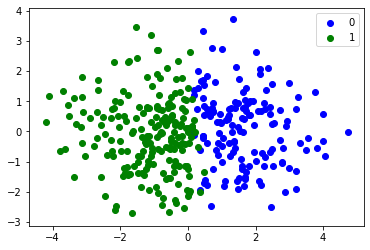

In [45]:
targets = [0, 1]
colors = ['b', 'g']

for target, color in zip(targets, colors):
    indices = final_df['cluster_predicted'] == target
    nn = plt.scatter(data_pca_12.loc[indices, 'pca_1'], data_pca_12.loc[indices, 'pca_2'], c = color)

ff = plt.legend(targets)

### Build an Index for Segment Comparison<a name="4c"></a>
Indexes are great for comparison

In [46]:
%%time

pop_median_df = pd.DataFrame(final_df.median(), columns=['population_median'])
pop_median_df = pop_median_df.reset_index()

grp_median_df = pd.DataFrame(final_df.groupby('cluster_predicted').median()).T
grp_median_df = grp_median_df.reset_index()

median_master_df = pd.merge(pop_median_df, grp_median_df, left_index=True, right_index=True)
median_master_df= median_master_df.drop(['index_y'], axis=1)
median_master_df.columns = ['question', 'pop_median', 'grp_0_median', 'grp_1_median']
# median_master_df.head()


pop_mean_df = pd.DataFrame(final_df.mean(), columns=['population_mean'])
pop_mean_df = pop_mean_df.reset_index()

grp_means_df = pd.DataFrame(final_df.groupby('cluster_predicted').mean()).T
grp_means_df = grp_means_df.reset_index()

mean_master_df = pd.merge(pop_mean_df, grp_means_df, left_index=True, right_index=True)
mean_master_df = mean_master_df.drop(['index_y'], axis=1)
mean_master_df.columns = ['question', 'pop_mean', 'grp_0_mean', 'grp_1_mean']
# mean_master_df.head()


summary_stat_df = pd.merge(mean_master_df, median_master_df, left_index=True, right_index=True)
summary_stat_df = summary_stat_df.drop(['question_y'], axis=1)

summary_stat_df['grp0_mean_index'] = (summary_stat_df['grp_0_mean']/summary_stat_df['pop_mean'])*100
summary_stat_df['grp0_median_index'] = (summary_stat_df['grp_0_median']/summary_stat_df['pop_median'])*100

summary_stat_df['grp1_mean_index'] = (summary_stat_df['grp_1_mean']/summary_stat_df['pop_mean'])*100
summary_stat_df['grp1_median_index'] = (summary_stat_df['grp_1_median']/summary_stat_df['pop_median'])*100

summary_stat_df = summary_stat_df.rename(columns={'question_x': 'question'})

cols_to_round = ['grp0_mean_index', 'grp1_mean_index', 'grp0_median_index', 'grp1_median_index']

summary_stat_df[cols_to_round] = summary_stat_df[cols_to_round].round()

convert_dict_2 = {'grp0_mean_index': int, 
                'grp1_mean_index': int, 
                'grp0_median_index': int, 
                'grp1_median_index': int,
               }

summary_stat_df = summary_stat_df.astype(convert_dict_2)
summary_stat_df = summary_stat_df.round(1)
# summary_stat_df


# build helper functions to interpret data in above df

def median_index_interpreter_0(row):
    if row['grp0_median_index'] > 100:
        insight = 'overindex'
    elif row['grp0_median_index'] < 100:
        insight = 'underindex'
    else:
        insight = 'even'
    return insight

summary_stat_df['grp0_median_insight'] = summary_stat_df.apply(median_index_interpreter_0, axis=1)

def mean_index_interpreter_0(row):
    if row['grp0_mean_index'] > 100:
        insight = 'overindex'
    elif row['grp0_mean_index'] < 100:
        insight = 'underindex'
    else:
        insight = 'even'
    return insight

summary_stat_df['grp0_mean_insight'] = summary_stat_df.apply(mean_index_interpreter_0, axis=1)


def median_index_interpreter_1(row):
    if row['grp1_median_index'] > 100:
        insight = 'overindex'
    elif row['grp1_median_index'] < 100:
        insight = 'underindex'
    else:
        insight = 'even'
    return insight

summary_stat_df['grp1_median_insight'] = summary_stat_df.apply(median_index_interpreter_1, axis=1)

def mean_index_interpreter_1(row):
    if row['grp1_mean_index'] > 100:
        insight = 'overindex'
    elif row['grp1_mean_index'] < 100:
        insight = 'underindex'
    else:
        insight = 'even'
    return insight

summary_stat_df['grp1_mean_insight'] = summary_stat_df.apply(mean_index_interpreter_1, axis=1)

summary_stat_df = summary_stat_df.sort_values(by=['question'], ascending=True)
summary_stat_df

Wall time: 34.9 ms


,question,pop_mean,grp_0_mean,grp_1_mean,pop_median,grp_0_median,grp_1_median,grp0_mean_index,grp0_median_index,grp1_mean_index,grp1_median_index,grp0_median_insight,grp0_mean_insight,grp1_median_insight,grp1_mean_insight
3,A_Concerned about interaction of medicine w/Rx,1.6,1.4,1.8,1.0,1,2,87,100,110,200,even,underindex,overindex,overindex
8,A_Don't care about cost if works,1.8,1.6,2.0,2.0,1,2,88,50,109,100,underindex,underindex,even,overindex
15,A_Interested in all alternate medicine,2.0,1.9,2.1,2.0,2,2,93,100,105,100,even,underindex,even,overindex
2,A_Symptoms don't slow me down,1.6,1.6,1.5,1.0,2,1,103,200,98,100,overindex,overindex,even,underindex
4,A_oncerned about interaction of medicine w/alcohol,2.1,1.7,2.4,2.0,1,3,81,50,114,150,underindex,underindex,overindex,overindex
12,B_Carry medicince everywhere,1.9,1.6,2.1,2.0,1,2,84,50,111,100,underindex,underindex,even,overindex
11,B_Get info on different medicine from family and friends,2.1,2.0,2.2,2.0,2,2,92,100,106,100,even,underindex,even,overindex
5,B_Lookout for newest medicine,2.4,2.1,2.7,3.0,2,3,87,67,110,100,underindex,underindex,even,overindex
13,B_Medicine at first sign of symptoms,2.1,1.9,2.3,2.0,2,2,91,100,107,100,even,underindex,even,overindex
6,B_Waging war on symptoms,1.9,1.7,2.0,2.0,2,2,90,100,108,100,even,underindex,even,overindex


In [47]:
# output to place into the presentation
summary_stat_df.to_excel('segment_index.xls')